<a href="https://colab.research.google.com/github/anishdass/MyMLRepository/blob/master/Learning_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from __future__ import absolute_import, division, print_function, unicode_literals
from tensorflow import keras
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import matplotlib.pyplot as plt

In [63]:
tf.__version__

'2.2.0-rc2'

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

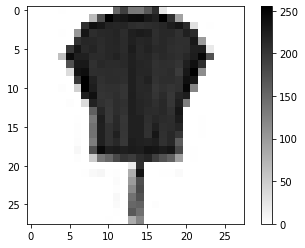

In [65]:
plt.figure()
plt.imshow(train_images[56], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [66]:
train_labels[:25]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4], dtype=uint8)

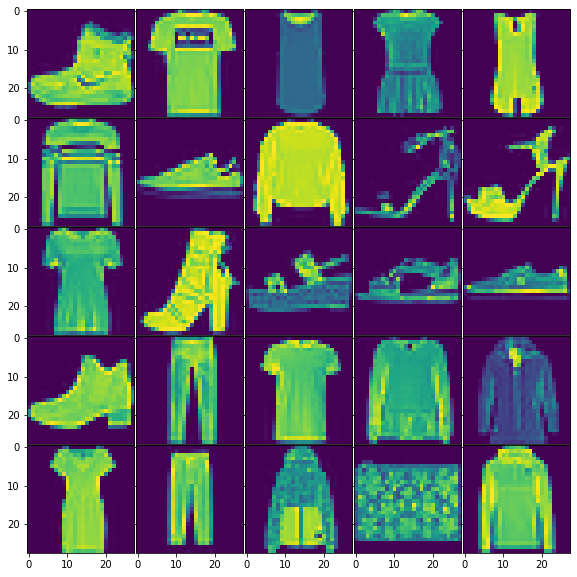

In [67]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5))

for ax, im in zip(grid,train_images[:25]):
    ax.imshow(im)

plt.show()

In [68]:
train_labels[:25]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1,
       4, 8, 4], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

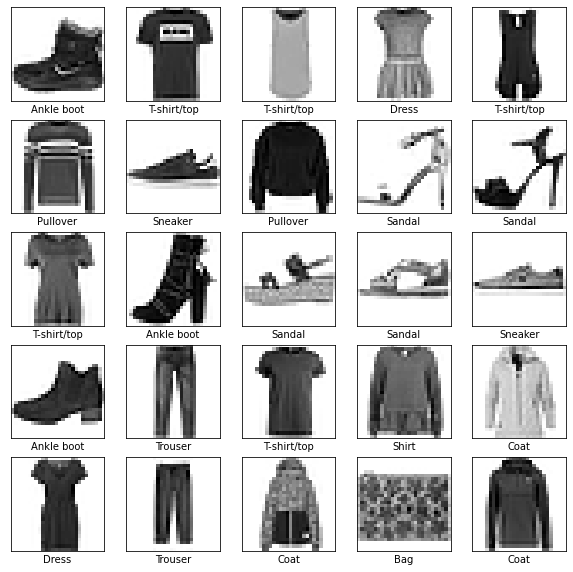

In [70]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [71]:
train_images.shape

(60000, 28, 28)

In [72]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

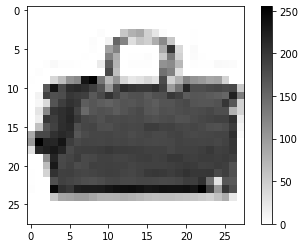

In [73]:
plt.figure()
plt.imshow(train_images[99], cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images/ 255.0

test_images =test_images /255.0

In [0]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [77]:
model.fit(train_images, train_labels, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4979 - accuracy: 0.8251
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3748 - accuracy: 0.8651
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3375 - accuracy: 0.8775
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.8840
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2974 - accuracy: 0.8904
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.8946
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2700 - accuracy: 0.8997
Epoch 8/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2594 - accuracy: 0.9037
Epoch 9/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2487 - accuracy: 0.9075
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [83]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2 )

print('\nTest Accuracy:', test_acc)

313/313 - 0s - loss: 0.3652 - accuracy: 0.8855

Test Accuracy: 0.8855000138282776


In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid()
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{}, {:2.0f}%, ({})".format(class_names[predicted_label], 
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
             color = color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = '#777777')
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

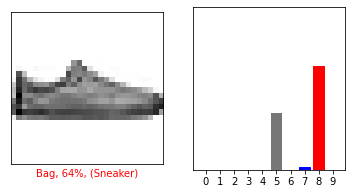

In [86]:
i=12
plt.figure(figsize = (6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

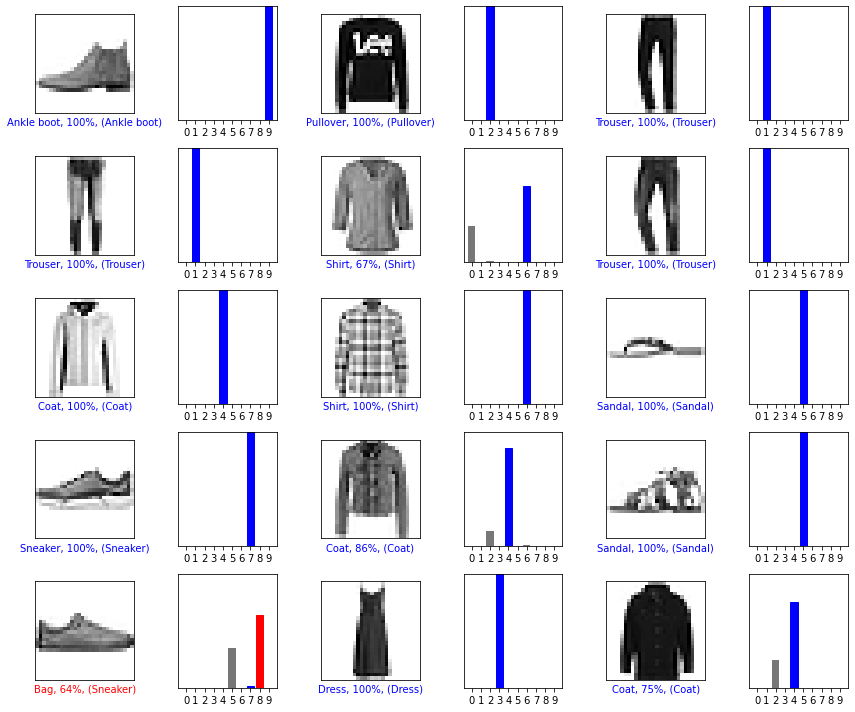

In [87]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()